# <span class="bg-primary">26. STATISTIQUE INFERENTIELLE - PYTHON</span>

# <span class="bg-info">Screencast 1 : stats descs sur Essence</span>

On importe le fichier contenant les consommations d’essence :

In [1]:
import pandas
essence=pandas.read_csv("essence.txt")

On calcule la moyenne, la variance et l’écart-type de l’échantillon :

In [2]:
# moyenne empirique de l'échantillon
import numpy, math
xbar=numpy.mean(essence['conso'])
round(xbar,2)

31.45

In [3]:
# écart-type empirique dans sa version non biaisée de l'échantillon
sprime = numpy.std(essence['conso'], ddof=1)
round(sprime,2)

2.16

In [4]:
# écart-type empirique dans sa version non biaisée de l'échantillon sprimecarré
n_essence = len(essence)
sprime2 = numpy.var(essence['conso'], ddof=1)
round(sprime2,2)

4.66

Si on souhaite obtenir la variance “biaisée”, on peut l’obtenir ainsi :

In [5]:
# calcul de la variance empirique biaisée /n
v = numpy.var(essence['conso'])
round(v,2)

4.63

On peut visualiser l’histogramme :

Text(0.5, 1.0, 'histogramme')

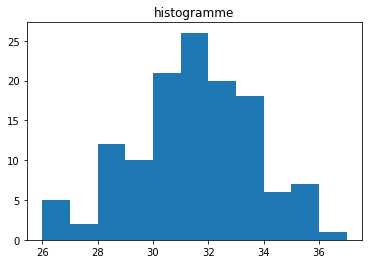

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(essence['conso'],bins=range(26,38))
plt.title("histogramme")

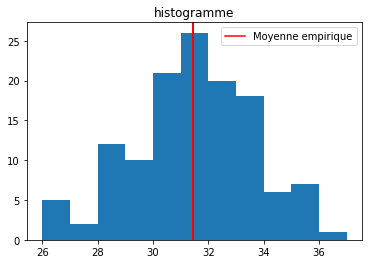

In [7]:
plt.hist(essence['conso'],bins=range(26,38))
plt.title("histogramme")
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

On peut visualiser sur cet histogramme la moyenne empirique et le seuil “métier” :

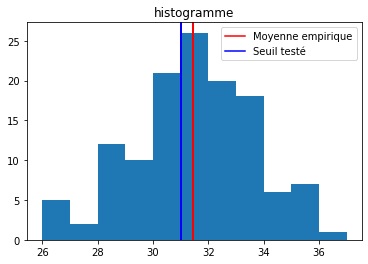

In [8]:
mu0=31
plt.hist(essence['conso'],bins=range(26,38))
plt.title("histogramme")
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(mu0, color='b', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),mlines.Line2D([], [], color='blue',markersize=15, label=u"Seuil testé")])
plt.show()

On peut enfin superposer sur cet histogramme la densité gaussienne :

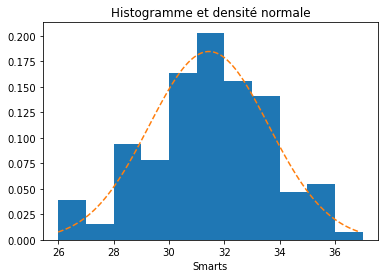

In [9]:
import matplotlib.mlab as mlab
from scipy.stats import norm
fig, ax = plt.subplots()
n, bins, patches = ax.hist(essence['conso'],density=True,bins=range(26,38))
bins=numpy.arange(26,37,0.1)
y = norm.pdf(bins, xbar, sprime)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_title(u"Histogramme et densité normale")
plt.show()

On constate que l’écart entre l’histogrammme, primo-estimation de la densité de probabilité, et la densité gaussienne sont plutôt proches.

# <span class="bg-info">Screencast 2 : IC sur Guerison</span>

On importe le fichier contenant les guérisons ou non-guérisons :

In [10]:
import pandas
guerison =pandas.read_csv("guerison.txt")

On peut estimer le taux de guerison théorique  p  :

In [11]:
n_guerison=len(guerison)
n_guerison_gueris= sum(guerison[guerison["guerison"]==1]["guerison"])
p_estim= n_guerison_gueris/float(n_guerison)
p_estim

0.7731481481481481

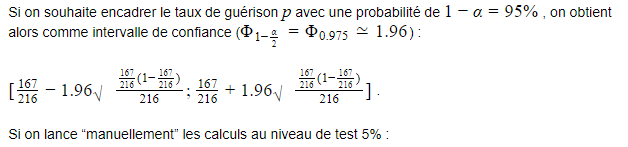

In [12]:
alpha = 0.05
from scipy.stats import norm
import math
icinf =p_estim-norm.ppf(1-alpha/2)*math.sqrt(p_estim*(1-p_estim)/n_guerison)
round(icinf,2)

0.72

In [13]:
icsup = p_estim+norm.ppf(1-alpha/2)*math.sqrt(p_estim*(1-p_estim)/n_guerison)
round(icsup,2)

0.83

On obtient alors : [0.72 ; 0.82]=[72% ; 83%] .

On constate que la largeur de l’intervalle n’est pas négligeable, mais n’oublions pas qu’il n’y a que 216 individus dans l’échantillon.

En pratique, le data analyst peut obtenir simplement cet intervalle à l’aide de la commande proportion_confint :

In [14]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(n_guerison_gueris,n_guerison, alpha=alpha, method='normal')

(0.7172980758199328, 0.8289982204763635)

On aurait également pu obtenir un intervalle de confiance “exact”, basé sur la loi binomiale :

In [15]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(n_guerison_gueris,n_guerison, alpha=alpha, 
                   method='binom_test')

(0.7110082209034149, 0.8245118012021776)

On constate que les résultats diffèrent très peu de l’intervalle de confiance asymptotique.

Enfin, si on avait choisi un niveau de confiance plus faible,  1−α=90%  par exemple, on aurait obtenu un intervalle de confiance plus étroit :

In [16]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(n_guerison_gueris,n_guerison, alpha=0.1, method='normal')

(0.7262772899287175, 0.8200190063675787)

On obtient ici  [0.726;0.820]=[72.6%;82.0%] , la largeur de l’intervalle a bel et bien diminué !

# <span class="bg-info">Screencast 3 : IC sur moyenne Essence</span>

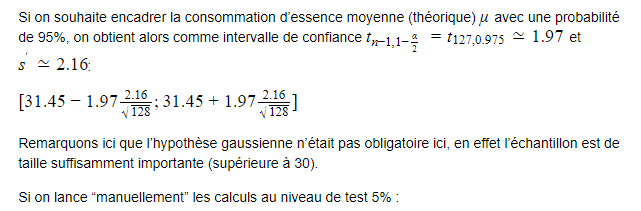

In [17]:
import scipy
icinf=xbar-scipy.stats.t.ppf(1-alpha/2,n_essence-1)*sprime/math.sqrt(n_essence)
round(icinf,2)

31.07

In [18]:
icsup=xbar+scipy.stats.t.ppf(1-alpha/2,n_essence-1)*sprime/math.sqrt(n_essence)
round(icsup,2)

31.83

On obtient alors : [31.07 ; 31.83] .

# <span class="bg-info">Screencast 4 : IC sur variance Essence</span>

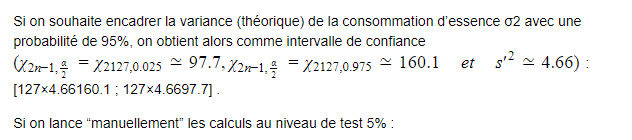

In [19]:
icinf = (n_essence-1)*sprime2/scipy.stats.chi2.ppf(1-alpha/2,n_essence-1)
round(icinf,2)

3.7

In [20]:
icsup = (n_essence-1)*sprime2/scipy.stats.chi2.ppf(alpha/2,n_essence-1)
round(icsup,2)

6.06

On obtient alors : [3.70 ; 6.06] .

Remarquons encore ici que l’hypothèse gaussienne n’était pas obligatoire ici, en effet l’échantillon est de taille suffisamment importante (supérieure à 30).

# <span class="bg-info">Screencast 5 : test sur Guerison</span>

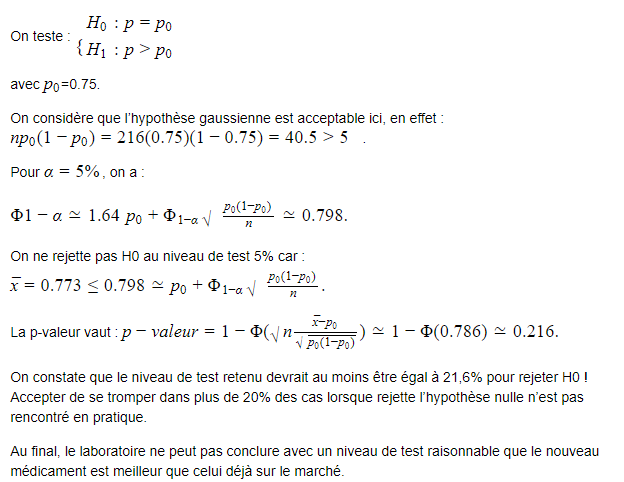

In [21]:
import statsmodels
statsmodels.stats.proportion.binom_test(n_guerison_gueris,n_guerison, prop=0.75, alternative='larger')

0.2418347955406261

In [33]:
# test naissance garçon
statsmodels.stats.proportion.binom_test(399284,78117, prop=0.5, alternative='larger')
# on rejette pour niveau de test de 5% qu'il y a autant de naissance garçon que fille

0.0

# <span class="bg-info">Screencast 7 : test sur moyenne Essence</span>

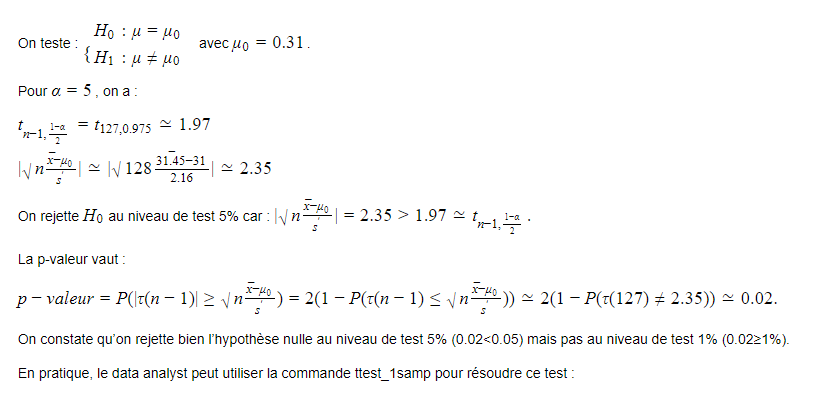

In [22]:
scipy.stats.ttest_1samp(essence["conso"],31)

Ttest_1sampResult(statistic=2.354357516761916, pvalue=0.020088330843337596)

# <span class="bg-info">Screencast 8 : test sur variance Essence</span>

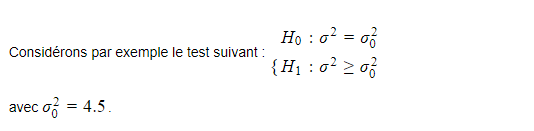

# <span class="bg-info">Screencast 9 : test comparaison sur Iris</span>

In [23]:
from sklearn import datasets
Iris = datasets.load_iris()

In [24]:
def function(x):
    return Iris['target_names'][x]
iris=pandas.DataFrame(Iris["data"])
iris.columns = Iris['feature_names']
iris["Species"]=Iris['target']
iris["Species"]=iris["Species"].apply(function)

In [25]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
versi = iris[iris["Species"]=="versicolor"]["petal length (cm)"]
virgi = iris[iris["Species"]=="virginica"]["petal length (cm)"]

On teste tout d’abord l’égalité des variances à l’aide de la commande :

In [27]:
scipy.stats.bartlett(versi,virgi)

BartlettResult(statistic=1.249026225204677, pvalue=0.2637385445079441)

La p-valeur valant 0.26, on ne rejette donc pas l’égalité des variances au niveau de test 5%.

On teste ensuite l’égalité des moyennes à l’aide de la commande :

In [28]:
scipy.stats.ttest_ind(versi,virgi, equal_var=True)

Ttest_indResult(statistic=-12.603779441384985, pvalue=3.1788195478061495e-22)

On obtient une p-valeur égale à environ 3.2×10−22. On constate donc que l’hypothèse d’égalité des longueurs moyennes de pétales est (très facilement) rejetée à un niveau de test de 5%.

Au-delà de l’aspect gaussien que nous n’avions pas vérifié rigoureusement (on pourrait l’éprouver via des tests d’adéquation à une loi), on rejette que les longueurs des pétales d’iris des variétés et suivent la même distribution, on a en effet rejeté l’hypothèse d’égalité des moyennes.

# <span class="bg-info">Screencast 10 : test Khi-deux sur Weldon</span>

Weldon a réalisé n=26306 lancers de 12 dés à 6 faces et a obtenu les résultats suivants :

In [29]:
df=pandas.DataFrame([[0,1,2,3,4,5,6,7,8,9,10,11,12],[185,1149,3265,5475,6114,5194,3067,1331,403,105,14,4,0]])
df.index=["Nombre de 5 ou 6","Effectif"]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Nombre de 5 ou 6,0,1,2,3,4,5,6,7,8,9,10,11,12
Effectif,185,1149,3265,5475,6114,5194,3067,1331,403,105,14,4,0


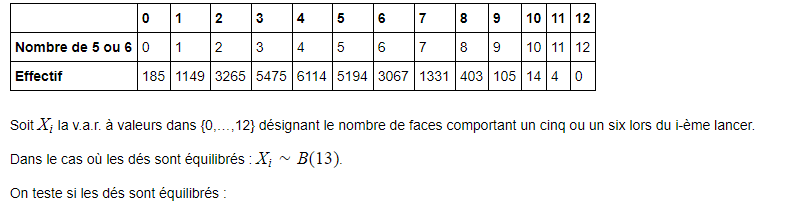

In [30]:
n =[185,1149,3265,5475,6114,5194,3067,1331,403,105,14,4,0]
p0 = scipy.stats.binom.pmf(range(13), 12, 1/3.0)

In [31]:
from scipy.stats import chi2_contingency
chi2_contingency([p0*float(sum(n))*100,n])

(40.74237982074653,
 5.410516619908499e-05,
 12,
 array([[2.02573723e+04, 1.21582848e+05, 3.34457039e+05, 5.57461402e+05,
         6.27099152e+05, 5.01979123e+05, 2.92857954e+05, 1.25526959e+05,
         3.92143653e+04, 8.72959493e+03, 1.30770657e+03, 1.21582685e+02,
         4.90092871e+00],
        [2.02573723e+02, 1.21582848e+03, 3.34457039e+03, 5.57461402e+03,
         6.27099152e+03, 5.01979123e+03, 2.92857954e+03, 1.25526959e+03,
         3.92143653e+02, 8.72959493e+01, 1.30770657e+01, 1.21582685e+00,
         4.90092871e-02]]))

In [32]:
Le test n’est pas valide car les effectifs ne sont pas suffisants pour les valeurs 10, 11 et 12. On agrège ces modalités et on relance les calculs :

SyntaxError: invalid syntax (<ipython-input-32-335eead6ec58>, line 1)

In [ ]:
n= [185,1149,3265,5475,6114,5194,3067,1331,403,105,18]
p0 =numpy.array(list(scipy.stats.binom.pmf(range(10), 12, 1/3.0))+[sum(scipy.stats.binom.pmf(range(10,13), 12, 1/3.0))])

In [ ]:
n

In [ ]:
p0

In [ ]:
chi2_contingency([p0*float(sum(n))*100,n])

On rejette très largement l’hypothèse de dés équilibrés au niveau de test 5%.

In [ ]:
# <span class="bg-info">Screencast 11 : test Kolmogorov-Smirnov sur Essence</span>

On peut tester l’adéquation de la consommation d’essence à une loi normale à l’aide de Kolmogorov-Smirnov :

In [ ]:
from scipy.stats import ks_2samp

In [ ]:
ks_2samp(essence["conso"],list(numpy.random.normal(numpy.mean(essence["conso"]), numpy.std(essence["conso"]), 1000)))

On ne peut donc pas rejetter l’hypothèse de normalité au niveau de test 5%.

On aurait également pu lancer un test de Shapiro-Wilk :

In [ ]:
scipy.stats.shapiro(essence["conso"])

La conclusion est identique au niveau de test 5%.

Notons que le test de Shapiro-Wilk est recommandé pour tester la normalité dans le cas de petits échantillons.

